In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud #For wordcloud text visualization

In [4]:
import plotly.io as pio
pio.renderers.default='colab' #initializing plotly( default mode is off as it consumes space)

Loading the dataset<br>
Dataset was obtained from <a href="https://www.worldometers.info/coronavirus/?utm_campaign=homeAdUOA?Si.">link</a>

In [6]:
 from google.colab import files
 files.upload()

Saving covid_worldometer_data.csv to covid_worldometer_data (1).csv


{'covid_worldometer_data.csv': b'S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha\n1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA\n2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND\n3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA\n4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS\n5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR\n6,France,"2,851,670","69,313","206,802","2,575,555","43,636","1,061",FRA\n7,Turkey,"2,364,801","23,495","2,236,938","104,368","27,878",277,TUR\n8,Italy,"2,336,279","80,848","1,694,051","561,380","38,671","1,338",ITA\n9,Spain,"2,211,967","53,079",,,"47,300","1,135",ESP\n10,Germany,"2,004,011","45,492","1,641,200","317,319","23,878",542,DEU\n11,Colombia,"1,849,101","47,491","1,683,835","117,775","36,133",928,COL\n12,Argentina,"1,770,715","45,125","1,549,490","176,100","38,986",994,ARG\n13,Mexico,"1,5

In [8]:
df=pd.read_csv('covid_worldometer_data.csv')
df

,S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha
0,1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA
1,2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND
2,3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA
3,4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS
4,5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR
...,...,...,...,...,...,...,...,...,...
216,217,Wallis and Futuna,4,,1,3,359,NaN,WLF
217,218,Samoa,2,,2,0,10,NaN,WSM
218,219,Micronesia,1,,NaN,1,9,NaN,FSM
219,220,Vanuatu,1,,1,0,3,NaN,VUT


Top 15 Countries with the highest total amount of cases in the world

In [13]:
px.bar(df.head(15),x='Country',y='TotalCases',color='Country')

USA has the highest number of cases, followed by India and Brazil

Top 15 Countries with the highest total deaths in the world

In [15]:
px.bar(df.head(15),x='Country',y='TotalDeaths',color='Country')

USA has the highest number of deaths, followed by Brazil and Mexico

In [16]:
df.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

Creating a scatterplot to check the totalcases against the totaldeaths

In [17]:
px.scatter(df,x='Totalcases/1M',y='TotalDeath/1M',color='Country')

San Marino shockingly has the highest death against total cases ratio meaning most of the cases that do occur end up in deaths.<br>
Andorra despite having relatively fewer cases compared to USA has an lmost similar infection to death ratio meaning despite the low cases that it has it still matches the USA


<h3>Using Choropleth maps for geographic visualization</h3>

A choropleth map helps in easy visualization of geographic data

We'll be using the iso_alpha column to render color to the choropleth map

In [19]:
df.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [23]:
px.choropleth(df,locations='iso_alpha',hover_name='Country',color='TotalDeath/1M',projection='orthographic',color_continuous_scale='viridis' )

The Choropleth map displays death cases of the different countries

The European countries colored white are beyond the range of the scale of the map


The African Countries colored white are because they are not represented by the iso_alpha which we use for the locations

Lets Focus on  a particular scope for example Asia

In [27]:
px.choropleth(df,locations='iso_alpha',hover_name='Country',color='TotalDeath/1M',scope='asia',color_continuous_scale='viridis' )

<h3>Visualizing pre - existing medical dataset from CDC on covid 19</h3>

In [31]:
from google.colab import files
files.upload()

Saving US_medical_data.csv to US_medical_data.csv


{'US_medical_data.csv': b'Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198,205,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968,985,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537,2584,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369,7555,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378,18829,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,32164,32832,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,39163,39762,\r\n1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,38650,39008,\r\n1/10/2021,1/4

Dataset Obtained from <a href="https://data.cdc.gov/NCHS/Conditions-contributing-to-deaths-involving-corona/hk9y-quqm">link</a>

In [34]:
df1=pd.read_csv('US_medical_data.csv')
df1

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12415,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,65-74,321.0,321.0,NaN
12416,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,75-84,366.0,366.0,NaN
12417,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,85+,264.0,264.0,NaN
12418,1/10/2021,1/4/2020,1/9/2021,PR,COVID-19,COVID-19,U071,Not stated,0.0,0.0,NaN


Exploring different columns

In [35]:
df1.groupby(['State']).count()

,Data as of,Start Week,End Week,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
State,,,,,,,,,,
AK,230,230,230,230,230,230,230,128,128,102
AL,230,230,230,230,230,230,230,186,189,44
AR,230,230,230,230,230,230,230,185,186,45
AZ,230,230,230,230,230,230,230,195,197,35
CA,230,230,230,230,230,230,230,209,210,21
CO,230,230,230,230,230,230,230,178,181,52
CT,230,230,230,230,230,230,230,181,183,49
DC,230,230,230,230,230,230,230,164,165,66
DE,230,230,230,230,230,230,230,140,142,90


In [36]:
df1.groupby(['Condition Group']).count()

,Data as of,Start Week,End Week,State,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition Group,,,,,,,,,,
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Circulatory diseases,3780,3780,3780,3780,3780,3780,3780,2889,2897,891
Diabetes,540,540,540,540,540,540,540,437,437,103
"Intentional and unintentional injury, poisoning, and other adverse events",540,540,540,540,540,540,540,353,412,187
Malignant neoplasms,540,540,540,540,540,540,540,394,398,146
Obesity,540,540,540,540,540,540,540,372,372,168
Renal failure,540,540,540,540,540,540,540,420,422,120


In [37]:
df1.groupby(['Condition']).count()

,Data as of,Start Week,End Week,State,Condition Group,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
Condition,,,,,,,,,,
Adult respiratory distress syndrome,540,540,540,540,540,540,540,423,423,117
All other conditions and causes (residual),540,540,540,540,540,540,540,460,485,80
Alzheimer disease,540,540,540,540,540,540,540,459,459,81
COVID-19,540,540,540,540,540,540,540,481,481,59
Cardiac arrest,540,540,540,540,540,540,540,418,418,122
Cardiac arrhythmia,540,540,540,540,540,540,540,403,403,137
Cerebrovascular diseases,540,540,540,540,540,540,540,406,406,134
Chronic lower respiratory diseases,540,540,540,540,540,540,540,422,423,118
Diabetes,540,540,540,540,540,540,540,437,437,103


In [38]:
df1.groupby(['Age Group']).count()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,COVID-19 Deaths,Number of Mentions,Flag
Age Group,,,,,,,,,,
0-24,1242,1242,1242,1242,1242,1242,1242,804,812,438
25-34,1242,1242,1242,1242,1242,1242,1242,654,670,588
35-44,1242,1242,1242,1242,1242,1242,1242,679,700,563
45-54,1242,1242,1242,1242,1242,1242,1242,816,837,426
55-64,1242,1242,1242,1242,1242,1242,1242,960,971,282
65-74,1242,1242,1242,1242,1242,1242,1242,1081,1092,161
75-84,1242,1242,1242,1242,1242,1242,1242,1126,1131,116
85+,1242,1242,1242,1242,1242,1242,1242,1101,1108,141
All Ages,1242,1242,1242,1242,1242,1242,1242,1203,1206,39


Visualizing the dataset

In [41]:
filter=df1[(df1['State']=='US')]


In [43]:
px.bar(df1,x='Age Group',y='COVID-19 Deaths',color='Condition',hover_name='Condition',log_y=True)

Above are the different conditions defined by the age they're most common at, with the covid-19 deaths at each 

In [44]:
px.bar(filter,x='Age Group',y='COVID-19 Deaths',color='Condition Group',hover_name='Condition')

How conditions and condition groups contribute to covid-19 deaths

In [46]:
filter1=df1[(df1['State']=='US') & (df1['Age Group'] =='All Ages')]

In [47]:
filter1.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [48]:
px.bar(filter1,x='Condition Group',y='COVID-19 Deaths',color='COVID-19 Deaths',hover_name='Condition')

Influenza and Pneumonia have killed a huge amount of people as conditions contributing to covid-19 deaths while diabetes has also been a huge contributant

**Breaking this down into states**

In [50]:
filter2=df1[(df1['Condition']=='Influenza and pneumonia') & (df1['Age Group']=='All Ages')]

In [51]:
filter2

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
9,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,139430.0,141763.0,NaN
239,1/10/2021,1/4/2020,1/9/2021,AL,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1734.0,1755.0,NaN
469,1/10/2021,1/4/2020,1/9/2021,AK,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,86.0,90.0,NaN
699,1/10/2021,1/4/2020,1/9/2021,AZ,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,4171.0,4239.0,NaN
929,1/10/2021,1/4/2020,1/9/2021,AR,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1393.0,1408.0,NaN
1159,1/10/2021,1/4/2020,1/9/2021,CA,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,13016.0,13118.0,NaN
1389,1/10/2021,1/4/2020,1/9/2021,CO,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1872.0,1914.0,NaN
1619,1/10/2021,1/4/2020,1/9/2021,CT,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,1107.0,1127.0,NaN
1849,1/10/2021,1/4/2020,1/9/2021,DE,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,297.0,304.0,NaN
2079,1/10/2021,1/4/2020,1/9/2021,DC,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,773.0,773.0,NaN


In [53]:
px.bar(filter2,x='State',y='COVID-19 Deaths',color='State',log_y=True)

Texas, California and New York had some of the highest deaths

**Text Visualization Using Word Cloud**

Converting column into list first

In [54]:
list1= filter1['Condition Group'].tolist()

converting list into string

In [55]:
string1="".join(list1)

feed string to the wordcloud generator

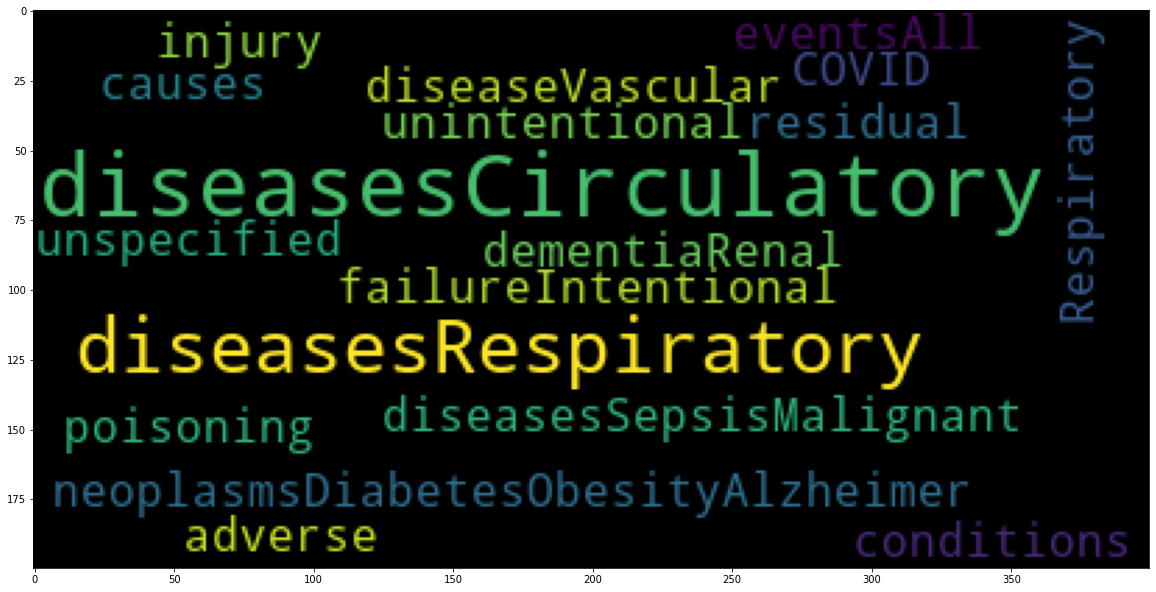

In [57]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string1))

Circulatory diseases and respiratory are in a bigger text than the rest since they have more deaths than the rest 

In [58]:
list2= filter1['Condition'].tolist()

In [60]:
string2="".join(list2)

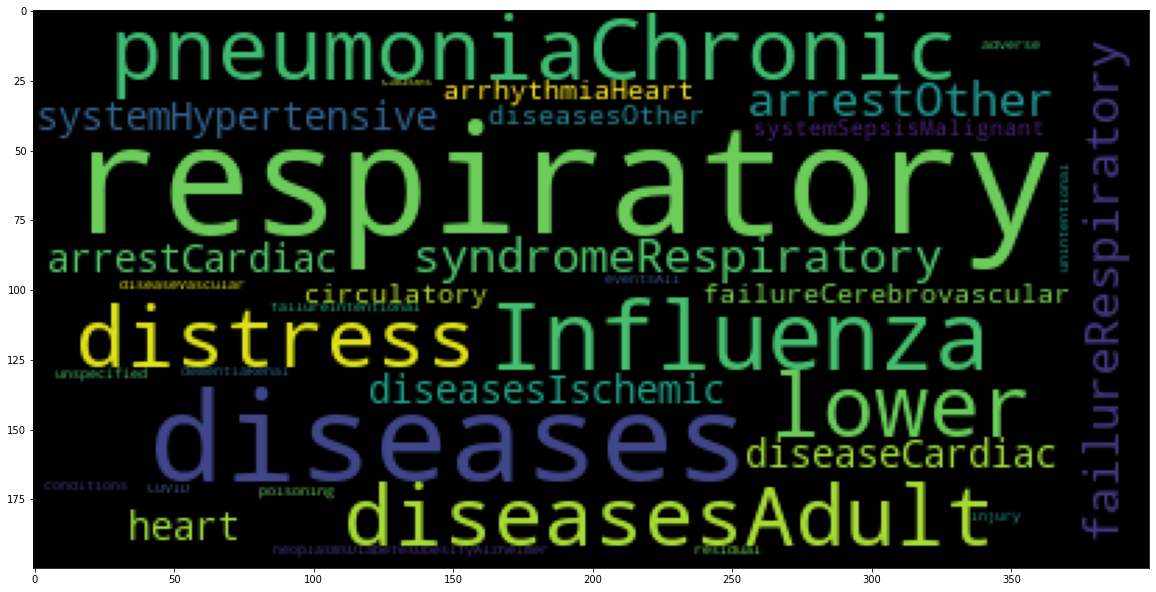

In [61]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(string2))

the size of the text determines the impact i.e resoiratory has a bigger impact